# More 3D Coordinate Transformations 1

We have already shown how Python is capable of performing and visualising the standard set of operations for 3D graphics transformations.

There are several additional useful operations than can be performed by matrices. This notebook will examine one of these: *reflection in a given plane*.

We may encounter times where we need to identify the location of objects when reflected in a specific plane:

In [1]:
## Libraries
import numpy as np
import math 
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

## Mirror reflection in a given plane

We have been shown in the lectures that reflecting an object in the plane $ ax+by+cz=0$ can be performed by multiplying a set of homogenous coordinates by the reflection matrix

$$
M_{\rm{reflection}} = 
	{\begin{pmatrix}
	-a^2+b^2+c^2 & -2ab & -2ac & 0  \\
	-2ab & a^2-b^2+c^2 & -2bc & 0  \\
	-2ac & -2bc & a^2+b^2-c^2 & 0  \\
	0 & 0 & 0 & a^2+b^2+c^2 
	\end{pmatrix}}.
$$

The additional factor of $a^2+b^2+c^2$ in the bottom right element of this matrix means that we must remember to check that we have returned to homogenous coordinates after the calculation has been carried out.

To test this, we will repeat one of the examples shown in the lectures:

### Lecture Example:
**Calculate the images of the points $(3,2,1)$ and $(-1,0,1)$ when reflected in the plane $2x+y-3z=4$**.


Let's set up a matrix of positions that we can transform. 

In [2]:
x_vals = np.array([3, -1])
y_vals = np.array([2, 0])
z_vals = np.array([1, 1])
p = np.array([x_vals, y_vals, z_vals])

Before we perform the transformation, let's plot the two positions and (because we can) draw a line between the two points:

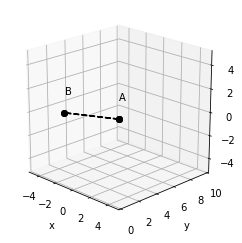

In [3]:
lx=np.append(x_vals,x_vals[0]) #drawing the line between the last and first coord
ly=np.append(y_vals,y_vals[0])
lz=np.append(z_vals,z_vals[0])
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=315, roll=0)
ax.plot(lx, ly, lz, 'ko', linestyle="--")
ax.plot(x_vals, y_vals, z_vals, 'ko')
ax.text(lx[0]-1, ly[0]+1, lz[0]+1, "A", c='k')
ax.text(lx[1]-1, ly[1]+1, lz[1]+1, "B", c='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(left=-5, right=5) 
ax.axes.set_ylim3d(bottom=0, top=10) 
ax.axes.set_zlim3d(bottom=-5, top=5)
plt.gca().set_aspect('equal')
plt.show()

When using Python this way, we need to remember i) to convert our arrays into the correct shape vector and ii) to include homogenous coordinates. In this case, rather than specifying the number of 1's needed, I will use Python to count the number of coordinate locations and produce an array of the same length. This new array is initialised by "1" in each element: this saves me having to do this manually, and can be extended easily if we introduce more coordinates into the problem.

Thus we can create our matrix of coordinates, formatted in the same way shown in class:

In [4]:
nr = [1 for x in range(len(x_vals))]
hp = np.vstack([p, nr])
print(hp.transpose())

[[ 3  2  1  1]
 [-1  0  1  1]]


Now we can turn our attention to the reflection matrix. 

We can only perform the calculation if the plane passes through the origin. A quick way to check is to see if the origin coordinates satisfy the plane equation:



In [5]:
a = 2
b = 1
c = -3
d = 4
print("LHS:", a*0+b*0+c*0)
print("RHS:", d)

LHS: 0
RHS: 4


Since the left and right hand sides of the plane equations do not match, the origin is not a solution of this equation. This means we need to translate our points, using the translation matrix we discussed previously:

$$
T_{\underline{w}} = 
	{\begin{pmatrix}
	1 & 0 & 0 & 0  \\
	0 & 1 & 0 & 0  \\
	0 & 0 & 1 & 0  \\
	a_x & a_y & a_z & 1 
	\end{pmatrix}},
$$

To identify the amount we need to move, we can rearrange the plane equation, so that if we choose some points for $x$ and $y$, the equation will determine values of z:


In [6]:
x1 = 1.
y1 = 2.
z1 = (a * x1 + b * y1 - d) / c
print(x1,y1,z1," lies on plane")

1.0 2.0 -0.0  lies on plane


This is the amount we will translate by (and while we are at it, we might as well create the opposite transformation that we'll have to use at the end too).

In [7]:
Tw = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [-x1,-y1, -z1, 1]])
Tv = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [x1, y1, z1, 1]])

Now we can create our reflection matrix from the formula:

In [8]:
Mr = np.matrix([[-a*a+b*b+c*c, -2*a*b, -2*a*c, 0], 
                [-2*a*b, a*a-b*b+c*c, -2*b*c, 0], 
                [-2*a*c, -2*b*c, a*a+b*b-c*c, 0],
                [0,0, 0, a*a+b*b+c*c]])

We've formed all the pieces that will allow us to perform the reflection in full, so let's go ahead and apply them to our coordinates:

In [9]:
rp = hp.transpose()*Tw*Mr*Tv
print(rp)

[[ 38.  26.  20.  14.]
 [ 22.  18. -40.  14.]]


Following the transformation, we note that the final column (our homogenous coordinates) contain something other than one. This means we need to divide *all* coordinates in that row by the element in the final column, such that they become equal to one.

In [10]:
rph = rp/rp[:,3:]
print(rph)

[[ 2.71428571  1.85714286  1.42857143  1.        ]
 [ 1.57142857  1.28571429 -2.85714286  1.        ]]


These are the locations of the reflected image in homogenous coordinates.

Finally, to demonstrate the power of Python, we can plot the solution we have found. For completeness, I will include the plane about which the reflection is performed and the original (unreflected) positions:

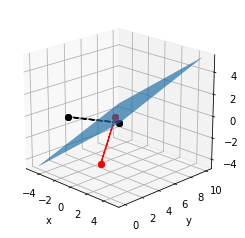

In [11]:
newp = rph[:,0:3].transpose()
x_vals1 = np.squeeze(np.asarray(newp[0,:]))
y_vals1 = np.squeeze(np.asarray(newp[1,:]))
z_vals1 = np.squeeze(np.asarray(newp[2,:]))
slx=np.append(x_vals1,x_vals1[0])
sly=np.append(y_vals1,y_vals1[0])
slz=np.append(z_vals1,z_vals1[0])
xr = [-5,5]
yr = [0,10]
zr = [-5,5]
ax.axes.set_xlim3d(left=xr[0], right=xr[1]) 
ax.axes.set_ylim3d(bottom=yr[0], top=yr[1]) 
ax.axes.set_zlim3d(bottom=zr[0], top=zr[1])
#need to set up mesh for plotting plane over range of x, y
x = np.linspace(xr[0],xr[1],50)
y = np.linspace(yr[0],yr[1],50)
X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=315, roll=0)
ax.plot(lx, ly, lz, 'ko', linestyle="--")
ax.plot(x_vals, y_vals, z_vals, 'ko')
ax.plot(slx, sly, slz, 'ro', linestyle="--")
ax.plot(x_vals1, y_vals1, z_vals1, 'ro')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
surf = ax.plot_surface(X, Y, Z)
plt.gca().set_aspect('equal')
plt.show()

In this example the points we need to reflect actually straddle the plane: the reflected images therefore also straddle the plane, but in the opposite sense.

## Over to you
Using the technique outlined above, can you use python to verify the solutions of your tutorial problems? Or visualise the reflections they create?